In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('merged_steam_data.csv')

df


appid                  name_x  price_x    ccu  type  \
0         10          Counter-Strike    999.0  16360  game   
1        220             Half-Life 2    999.0   1177  game   
2        240  Counter-Strike: Source    999.0   7752  game   
3        550           Left 4 Dead 2    999.0  20328  game   
4        620                Portal 2    199.0   2793  game   
..       ...                     ...      ...    ...   ...   
334  1593500              God of War   4999.0  12509  game   
335  1677740            Stumble Guys    799.0   4423  game   
336  1794680       Vampire Survivors    299.0  52451  game   
337  1832640     Mirror 2: Project X    199.0   3505  game   
338  1843760             Rogue Tower   1499.0   2858  game   

                     name_y required_age  is_free controller_support  \
0            Counter-Strike          0.0    False                NaN   
1               Half-Life 2          0.0    False                NaN   
2    Counter-Strike: Source          0.0    False                NaN   
3             Left 4 Dead 2          0.0    False               full   
4                  Portal 2          0.0    False               full   
..                      ...          ...      ...                ...   
334              God of War           18    False               full   
335            Stumble Guys            0    False                NaN   
336       Vampire Survivors          0.0    False               full   
337     Mirror 2: Project X          0.0    False                NaN   
338             Rogue Tower          0.0    False                NaN   

                                                        dlc  \
0                                                       NaN   
1                                                  [323140]   
2                                                       NaN   
3                                                       NaN   
4                                                  [323180]   
..                                                      ...   
334                                                     NaN   
335                                                     NaN   
336                                                     NaN   
337  [1881490, 1858303, 1858305, 1867630, 1858300, 1858301]   
338                                               [1867020]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [94]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Load your dataset (replace with your actual filename)
df = pd.read_csv("merged_steam_data.csv")

print("Column names:")
print(df.columns.tolist())

print("\nFirst row:")
print(df.iloc[0])

df = df.drop(columns=['legal_notice', 'demos', 'drm_notice', 'ext_user_account_notice', 'fullgame', 'controller_support', 'detailed_description', 'about_the_game', 'short_description', 'package_groups', 'metacritic', 'reviews', 'screenshots', 'movies', 'recommendations', 'achievements', 'support_info', 'background', 'content_descriptors', 'type', 'is_free', 'release_date', 'platforms', 'required_age', 'categories', 'genres', 'dlc', 'mac_requirements', 'linux_requirements', 'pc_requirements', 'developers', 'publishers', 'header_image', 'website', 'release_date', 'supported_languages', 'price_y', 'packages'])
df = df.drop(columns=['name_y'])
df = df.drop(columns=['name_x'])
df['game_id'] = df.index
df

Column names:
['appid', 'name_x', 'price_x', 'ccu', 'type', 'name_y', 'required_age', 'is_free', 'controller_support', 'dlc', 'detailed_description', 'about_the_game', 'short_description', 'fullgame', 'supported_languages', 'header_image', 'website', 'pc_requirements', 'mac_requirements', 'linux_requirements', 'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers', 'publishers', 'demos', 'price_y', 'packages', 'package_groups', 'platforms', 'metacritic', 'reviews', 'categories', 'genres', 'screenshots', 'movies', 'recommendations', 'achievements', 'release_date', 'support_info', 'background', 'content_descriptors']

First row:
appid                                                                                                                                                                                                                                                                                                                                                         

,appid,price_x,ccu,game_id
0,10,999.0,16360,0
1,220,999.0,1177,1
2,240,999.0,7752,2
3,550,999.0,20328,3
4,620,199.0,2793,4
...,...,...,...,...
334,1593500,4999.0,12509,334
335,1677740,799.0,4423,335
336,1794680,299.0,52451,336
337,1832640,199.0,3505,337


   appid  price_x    ccu  game_id
0     10    999.0  16360        0
1    220    999.0   1177        1
2    240    999.0   7752        2
3    550    999.0  20328        3
4    620    199.0   2793        4


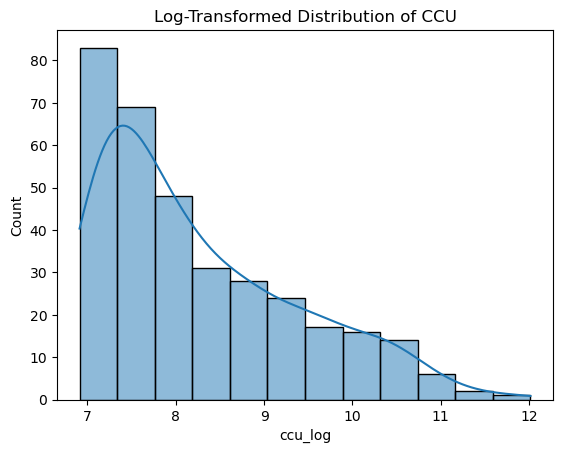

In [95]:


# Step 6: Convert data types where necessary
df['price_x'] = pd.to_numeric(df['price_x'], errors='coerce')  # Convert price to numeric, if needed
df['ccu'] = pd.to_numeric(df['ccu'], errors='coerce')  # Convert ccu to numeric, if needed

# Step 7: Check and remove duplicate rows based on 'appid' or other relevant columns
df = df.drop_duplicates(subset=['appid'])

# Step 9: Reinspect data after cleaning
print(df.head())

# Step 10: Save the cleaned data to a new CSV for future use
df.to_csv('cleaned_steam_data.csv', index=False)


###########################

# Drop rows with NaN values in important columns
df.dropna(subset=['price_x', 'ccu'], inplace=True)

# Create a unique numeric game ID if needed
#df['game_id'] = df.index

# Select features for scaling
features = df[['price_x', 'ccu']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Replace original features with scaled versions
df['price_x_scaled'] = scaled_features[:, 0]
df['ccu_scaled'] = scaled_features[:, 1]

# Final feature set
X = df[['price_x_scaled', 'ccu_scaled']]
y = df['game_id']

#####

# Apply log transformation to the target variable (if it's highly skewed)
df['ccu_log'] = np.log1p(df['ccu'])

# Visualize the distribution of the log-transformed target variable
sns.histplot(df['ccu_log'], kde=True)
plt.title('Log-Transformed Distribution of CCU')
plt.show()

# Drop the target variable 'ccu' (since we're using 'ccu_log' now) and split the dataset
X = df.drop(columns=['ccu', 'ccu_log'])  # Remove original CCU and log-transformed CCU
y = df['ccu_log']

# Apply Standard Scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.2763
Mean Squared Error: 0.3028376504209418
R^2 Score: 0.7495587879772984


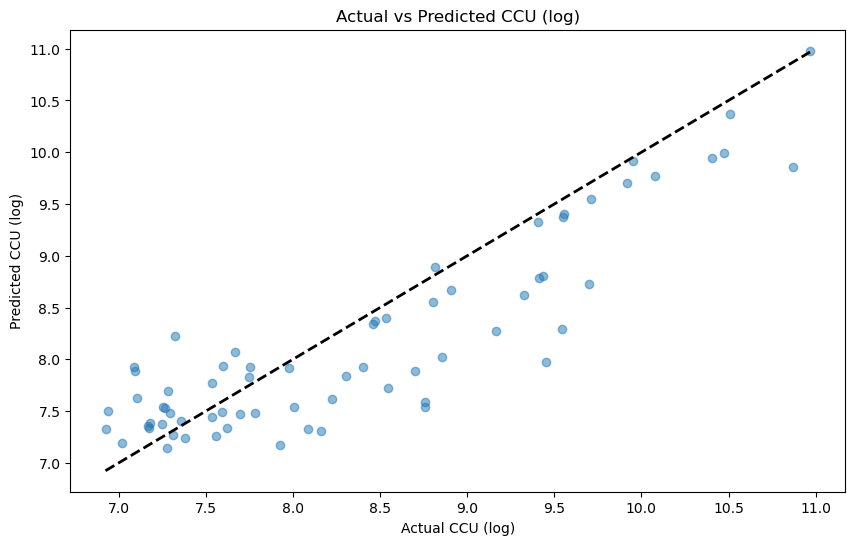

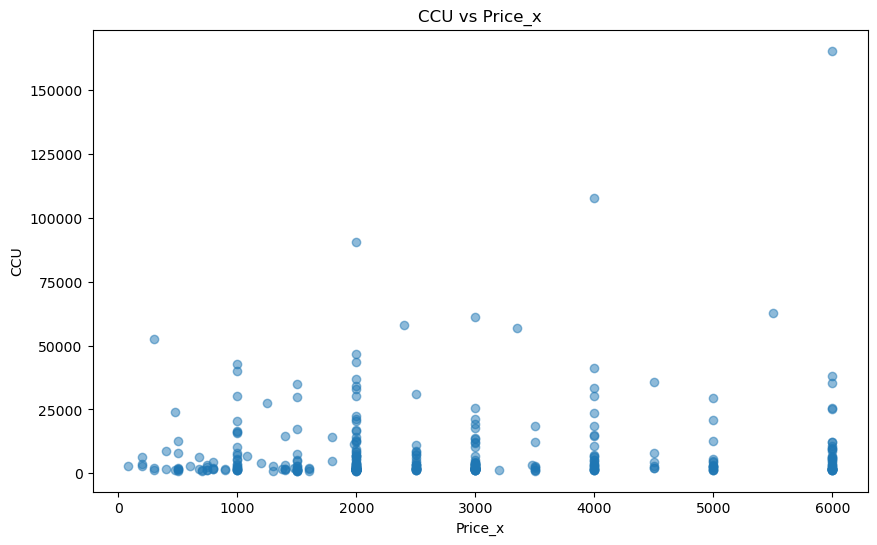

In [96]:
from sklearn.model_selection import GridSearchCV

# Define KNN model
knn = KNeighborsRegressor()

# Define the hyperparameter grid (expanded range for tuning)
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],  # Explore more neighbor values
    'weights': ['uniform', 'distance'],    # Explore weight functions
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms for KNN
    'leaf_size': [10, 20, 30, 40],  # Range of leaf sizes
}

# Set up GridSearchCV with 5-fold cross-validation and negative MSE scoring
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print best hyperparameters and best score
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {-grid_search.best_score_:.4f}")

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CCU (log)')
plt.ylabel('Predicted CCU (log)')
plt.title('Actual vs Predicted CCU (log)')
plt.show()

# Optionally, plot CCU vs price_x to see if there's any obvious pattern
plt.figure(figsize=(10, 6))
plt.scatter(df['price_x'], df['ccu'], alpha=0.5)
plt.xlabel('Price_x')
plt.ylabel('CCU')
plt.title('CCU vs Price_x')
plt.show()
